# Setting Up Project


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from google.colab import files
files.upload()

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 1.15G/1.15G [00:23<00:00, 62.1MB/s]



In [0]:
from pathlib import Path
path = Path('gdrive/My Drive/DMBI-PROJECT')

In [0]:
!rm -rf data/
!mkdir data

In [0]:
!unzip -d data/ path/chest_xray.zip 

Archive:  path/chest_xray.zip
   creating: data/chest_xray/
  inflating: data/chest_xray/.DS_Store  
   creating: data/__MACOSX/
   creating: data/__MACOSX/chest_xray/
  inflating: data/__MACOSX/chest_xray/._.DS_Store  
   creating: data/chest_xray/test/
  inflating: data/chest_xray/test/.DS_Store  
   creating: data/__MACOSX/chest_xray/test/
  inflating: data/__MACOSX/chest_xray/test/._.DS_Store  
   creating: data/chest_xray/test/PNEUMONIA/
  inflating: data/chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: data/__MACOSX/chest_xray/test/PNEUMONIA/
  inflating: data/__MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: data/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: data/__MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: data/chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: data/__MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: data/chest_

In [0]:
!rm -rf data/__MACOSX/

In [0]:
!mv data/chest_xray/val data/chest_xray/valid

In [0]:
!rm -rf path

In [0]:
!mv "gdrive/My Drive/DMBI-PROJECT/path/chest_xray/valid (1)/" "gdrive/My Drive/DMBI-PROJECT/path/chest_xray/valid/" 

In [0]:
!ls "gdrive/My Drive/DMBI-PROJECT/path/chest_xray/"

models	test  train  valid


# Data Preprocessing and Loading

In [0]:
loc = Path('gdrive/My Drive/DMBI-PROJECT/path/chest_xray/')

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
src = (ImageList.from_folder(loc)
      .split_by_folder()
      .label_from_folder()
      .add_test_folder())

In [0]:
tfms = get_transforms()


In [0]:
data = (src.transform(tfms,size=128)
       .databunch().normalize(imagenet_stats))
data

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray;

Test: LabelList (16 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray

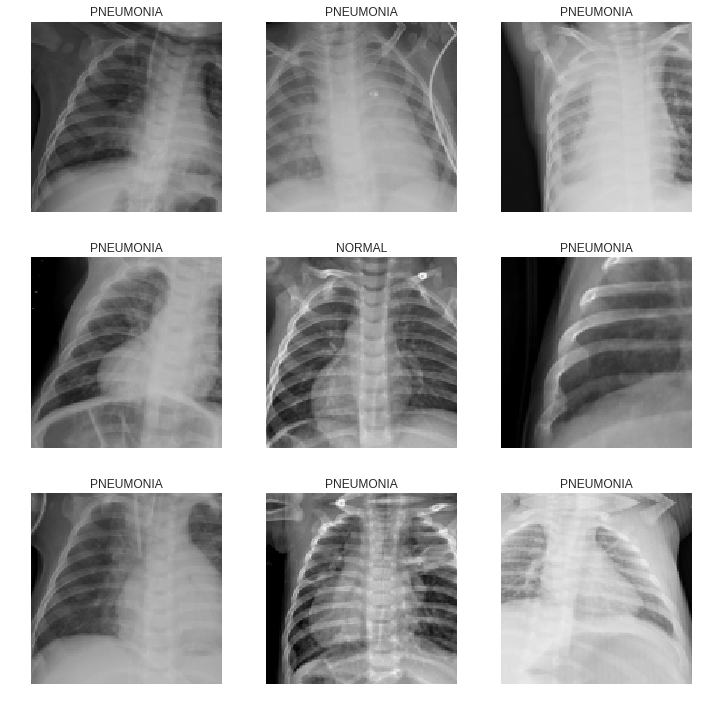

In [0]:
data.show_batch(rows=3,figsize=(10,10))

# Resnet34 Modeling 

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=(error_rate,accuracy))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 28674745.14it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


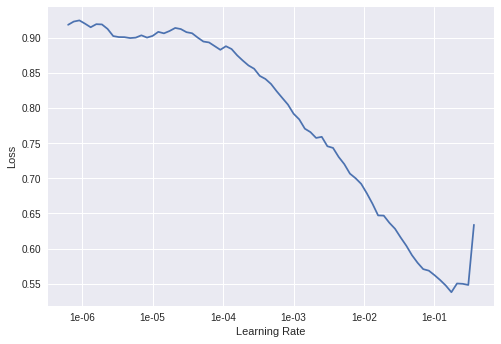

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,2e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.229644,0.320530,0.084936,0.915064,05:24
1,0.182406,0.351350,0.163462,0.836538,03:55
2,0.128194,0.232212,0.073718,0.926282,03:56
3,0.093557,0.240624,0.068910,0.931090,03:56
4,0.082553,0.282201,0.091346,0.908654,03:58


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray;

Test: LabelList (16 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_s

**Fine Tunning Model**

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


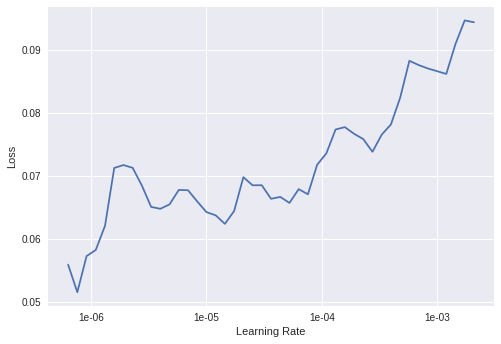

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.067663,0.273069,0.084936,0.915064,03:57
1,0.072145,0.266911,0.083333,0.916667,03:58
2,0.063237,0.238141,0.078526,0.921474,03:56
3,0.066235,0.253928,0.078526,0.921474,03:58
4,0.068417,0.290797,0.089744,0.910256,03:58


In [0]:
learn.save('stage-2')

**Progressive Resizing**

In [0]:
data = (src.transform(tfms,size=224)
       .databunch()
       .normalize(imagenet_stats));
learn.freeze()
data

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray;

Test: LabelList (16 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: gdrive/My Drive/DMBI-PROJECT/path/chest_xray

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


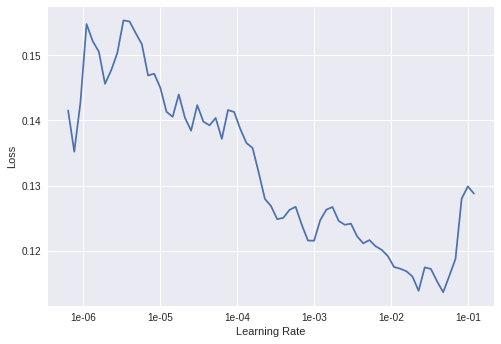

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(7e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.109065,0.293972,0.105769,0.894231,05:06
1,0.098519,0.380504,0.137821,0.862179,05:08
2,0.087384,0.336442,0.092949,0.907051,05:10
3,0.080603,0.311061,0.102564,0.897436,05:14
4,0.067002,0.265741,0.088141,0.911859,05:11


In [0]:
learn.save('good-res-91')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


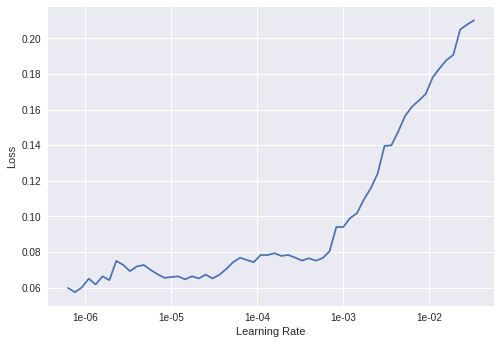

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,slice(8e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.076951,0.286583,0.091346,0.908654,05:12
1,0.069483,0.334163,0.105769,0.894231,05:13
2,0.073349,0.332479,0.099359,0.900641,05:14
3,0.063188,0.319164,0.102564,0.897436,05:14
4,0.060886,0.304304,0.091346,0.908654,05:16


In [0]:
learn.save('fine-prog')

# Resnet-50


In [0]:
tfms = get_transforms()
data = (src.transform(tfms,size=256).databunch().normalize(imagenet_stats))
learn = cnn_learner(data,models.resnet50,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:04, 23030035.69it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


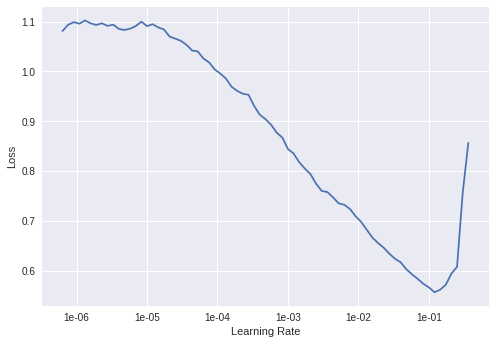

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8,2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.021744,0.720801,0.583333,05:50
1,0.728273,0.507926,0.762821,05:41
2,0.542002,0.465254,0.793269,05:46
3,0.437456,0.443583,0.814103,05:48
4,0.385298,0.418112,0.838141,05:46
5,0.365232,0.414878,0.838141,05:46
6,0.351327,0.415057,0.838141,05:48
7,0.353908,0.412880,0.838141,05:48


# Results

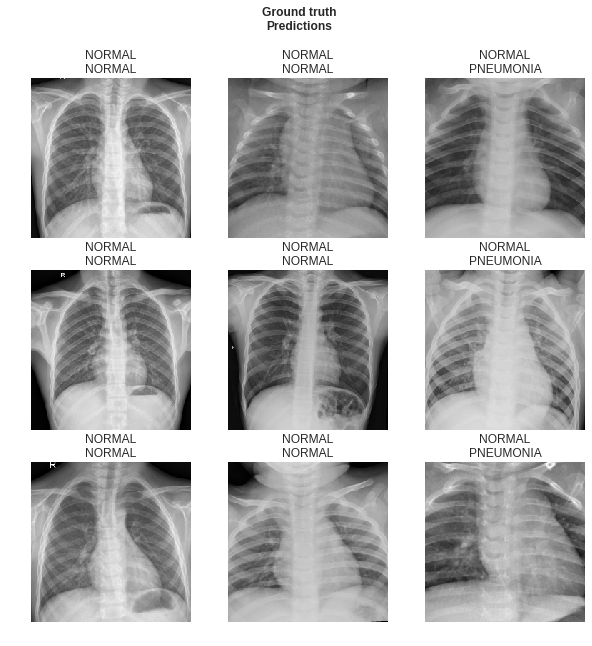

In [0]:
learn.show_results(rows=3,figsize=(10,10))